In [8]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from operator import itemgetter
import sys 
import xlrd
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import datetime as dt
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from keras.layers import Input, Dense, Embedding, Conv1D, MaxPool1D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split

In [9]:
Data=pickle.load(open("NormalizedData0410.txt","rb"))
SID=Data["SID"].values.tolist()
SID2=list(set(SID))
Systems=[Data[Data["SID"]==SID2[i]] for i in range(len(SID2)) ]

In [10]:
Data2=pickle.load(open("NormalizedData1311.txt","rb"))
SID2=Data2["SID"].values.tolist()
SID2=list(set(SID))
Systems2=[Data2[Data2["SID"]==SID2[i]] for i in range(len(SID2)) ]

In [11]:
Size=pickle.load(open("SystemSize.txt","rb"))
t=Size["Host DB Size (GiB)"].values.tolist()
t=[i/1000 for i in t]
for i in range(len(t)):
    if(t[i]<0.3):
        t[i]=0.5
    elif(t[i]<0.6):
        t[i]=0.5
    elif(t[i]<1.7):
        t[i]=1.5
    elif(t[i]<3.2):
        t[i]=3
    elif(t[i]<4.5):
        t[i]=4
    else:
        t[i]=6
Size["Host DB Size (GiB)"]=t

In [12]:
datanew=[Systems[i].drop(["SID"],axis=1) for i in range(len(Systems))]
dl=[i.values.tolist() for i in datanew]
dataall=[]
label=[]
dt=[]
lt=[]
for i in range(len(dl)):
    t2=[]
    l2=[]
    step=14
    t=[dl[i][j:j+step] for j in range(0,len(dl[i]),14) if len(dl[i][j:j+step])==step]
    l=[list(map(itemgetter(0),i)) for i in t]
    for h in range(len(t)-1):
        if(max(l[h+1])>0.001):
            dataall.append([m for m in t[h]])
            label.append(max(l[h+1]))
            t2.append([m for m in t[h]])
            l2.append(max(l[h+1]))
    dt.append(t2)
    lt.append(l2)

In [6]:
for i in range(len(dataall)):
    dataall[i].append(label[i])
np.random.shuffle(dataall)
label=[]
for i in range(len(dataall)):
    label.append(dataall[i].pop())

In [13]:
len(dataall)

3117

In [14]:
train_X=dataall[:2500]
train_Y=label[:2500]
train_Y=[[i] for i in train_Y]
test_X=dataall[2500:]
test_Y=label[2500:]
test_Y=[[i] for i in test_Y]


In [65]:
for i in range(len(train_X)):
    if(max(train_Y[i])>0.1):
        train_X.append(train_X[i])
        train_Y.append(train_Y[i])
        train_X.append(train_X[i])
        train_Y.append(train_Y[i])

In [15]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)
test_X=np.array(test_X)
test_Y=np.array(test_Y)

In [16]:
def save_variable(v,filename):
    f=open(filename,'wb')
    pickle.dump(v,f)
    f.close()
    return filename

In [17]:
save_variable(train_X,"1911X.txt")
save_variable(train_Y,"1911Y.txt")
save_variable(test_X,"1911test_X.txt")
save_variable(test_Y,"1911test_Y.txt")

'1911test_Y.txt'

In [30]:
train_X=pickle.load(open("1811.txt","rb"))
train_Y=pickle.load(open("1811Y.txt","rb"))
test_X=pickle.load(open("1311X.txt","rb"))
test_Y=pickle.load(open("1311Y.txt","rb"))


In [18]:
sequence_length = train_X.shape[1] 
embedding_dim = 28
filter_sizes = [3,4,5]
num_filters = 15
drop = 0.5
epochs = 3000
batch_size = 50

In [14]:
inputs = Input(shape=(14,28))

conv_0 = Conv1D(num_filters, kernel_size=(filter_sizes[0]), padding='valid', kernel_initializer='normal', activation='tanh')(inputs)
conv_1 = Conv1D(num_filters, kernel_size=(filter_sizes[1]), padding='valid', kernel_initializer='normal', activation='tanh')(inputs)
conv_2 = Conv1D(num_filters, kernel_size=(filter_sizes[2]), padding='valid', kernel_initializer='normal', activation='tanh')(inputs)

maxpool_0 = MaxPool1D(pool_size=(sequence_length - filter_sizes[0] + 1), strides=(1,), padding='valid')(conv_0)
maxpool_1 = MaxPool1D(pool_size=(sequence_length - filter_sizes[1] + 1), strides=(1,), padding='valid')(conv_1)
maxpool_2 = MaxPool1D(pool_size=(sequence_length - filter_sizes[2] + 1), strides=(1,), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=1)(dropout)

In [19]:
inputs = Input(shape=(14,28))

conv_0 = Conv1D(num_filters, kernel_size=(filter_sizes[0]), padding='valid', kernel_initializer='normal', activation='tanh')(inputs)
conv_1 = Conv1D(num_filters, kernel_size=(filter_sizes[1]), padding='valid', kernel_initializer='normal', activation='tanh')(inputs)
conv_2 = Conv1D(num_filters, kernel_size=(filter_sizes[2]), padding='valid', kernel_initializer='normal', activation='tanh')(inputs)
conv_3 = Conv1D(num_filters, kernel_size=(filter_sizes[2]), padding='valid', kernel_initializer='normal', activation='tanh')(inputs)

maxpool_0 = MaxPool1D(pool_size=2, strides=(1,), padding='valid')(conv_0)
maxpool_1 = MaxPool1D(pool_size=2, strides=(1,), padding='valid')(conv_1)
maxpool_2 = MaxPool1D(pool_size=2, strides=(1,), padding='valid')(conv_2)
maxpool_3 = MaxPool1D(pool_size=2, strides=(1,), padding='valid')(conv_3)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=1, activation='sigmoid')(dropout)

In [24]:
model = Model(inputs=inputs, outputs=output)

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-09, decay=1e-6)

model.compile(optimizer=adam, loss='MSE', metrics=['accuracy'])
print("Traning Model...")
model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[checkpoint], validation_data=(test_X, test_Y))  # starts training

Traning Model...
Train on 2500 samples, validate on 617 samples
Epoch 1/3000
2500/2500 [==============================] - 1s 248us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to weights.001-0.0000.hdf5
Epoch 2/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0039 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val

2500/2500 [==============================] - 0s 67us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 00042: val_acc did not improve from 0.00000
Epoch 43/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00043: val_acc did not improve from 0.00000
Epoch 44/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 00044: val_acc did not improve from 0.00000
Epoch 45/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 00045: val_acc did not improve from 0.00000
Epoch 46/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 00046: val_acc did not improve from 0.00000
Epoch 47/3000
2500/2500 [====


Epoch 00083: val_acc did not improve from 0.00000
Epoch 84/3000
2500/2500 [==============================] - 0s 69us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00084: val_acc did not improve from 0.00000
Epoch 85/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00085: val_acc did not improve from 0.00000
Epoch 86/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00086: val_acc did not improve from 0.00000
Epoch 87/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 00087: val_acc did not improve from 0.00000
Epoch 88/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0020 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00088: v

2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00125: val_acc did not improve from 0.00000
Epoch 126/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 00126: val_acc did not improve from 0.00000
Epoch 127/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00127: val_acc did not improve from 0.00000
Epoch 128/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00128: val_acc did not improve from 0.00000
Epoch 129/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0039 - val_acc: 0.0000e+00

Epoch 00129: val_acc did not improve from 0.00000
Epoch 130/3000
2500/2500 

2500/2500 [==============================] - 0s 69us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00166: val_acc did not improve from 0.00000
Epoch 167/3000
2500/2500 [==============================] - 0s 68us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00167: val_acc did not improve from 0.00000
Epoch 168/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0020 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00168: val_acc did not improve from 0.00000
Epoch 169/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00169: val_acc did not improve from 0.00000
Epoch 170/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 00170: val_acc did not improve from 0.00000
Epoch 171/3000
2500/2500 

2500/2500 [==============================] - 0s 63us/step - loss: 0.0020 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00207: val_acc did not improve from 0.00000
Epoch 208/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00208: val_acc did not improve from 0.00000
Epoch 209/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00209: val_acc did not improve from 0.00000
Epoch 210/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00210: val_acc did not improve from 0.00000
Epoch 211/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00211: val_acc did not improve from 0.00000
Epoch 212/3000
2500/2500 

2500/2500 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00248: val_acc did not improve from 0.00000
Epoch 249/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00249: val_acc did not improve from 0.00000
Epoch 250/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00250: val_acc did not improve from 0.00000
Epoch 251/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00251: val_acc did not improve from 0.00000
Epoch 252/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00252: val_acc did not improve from 0.00000
Epoch 253/3000
2500/2500 

2500/2500 [==============================] - 0s 69us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00289: val_acc did not improve from 0.00000
Epoch 290/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00290: val_acc did not improve from 0.00000
Epoch 291/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00291: val_acc did not improve from 0.00000
Epoch 292/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 00292: val_acc did not improve from 0.00000
Epoch 293/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00293: val_acc did not improve from 0.00000
Epoch 294/3000
2500/2500 

2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00330: val_acc did not improve from 0.00000
Epoch 331/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00331: val_acc did not improve from 0.00000
Epoch 332/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00332: val_acc did not improve from 0.00000
Epoch 333/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00333: val_acc did not improve from 0.00000
Epoch 334/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00334: val_acc did not improve from 0.00000
Epoch 335/3000
2500/2500 

2500/2500 [==============================] - 0s 61us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0029 - val_acc: 0.0000e+00

Epoch 00371: val_acc did not improve from 0.00000
Epoch 372/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00372: val_acc did not improve from 0.00000
Epoch 373/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00373: val_acc did not improve from 0.00000
Epoch 374/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00374: val_acc did not improve from 0.00000
Epoch 375/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00375: val_acc did not improve from 0.00000
Epoch 376/3000
2500/2500 

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00412: val_acc did not improve from 0.00000
Epoch 413/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00413: val_acc did not improve from 0.00000
Epoch 414/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00414: val_acc did not improve from 0.00000
Epoch 415/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00415: val_acc did not improve from 0.00000
Epoch 416/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00416: val_acc did not improve from 0.00000
Epoch 417/3000
2500/2500 

2500/2500 [==============================] - 0s 71us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00453: val_acc did not improve from 0.00000
Epoch 454/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 00454: val_acc did not improve from 0.00000
Epoch 455/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00455: val_acc did not improve from 0.00000
Epoch 456/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00456: val_acc did not improve from 0.00000
Epoch 457/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00457: val_acc did not improve from 0.00000
Epoch 458/3000
2500/2500 

2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00494: val_acc did not improve from 0.00000
Epoch 495/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00495: val_acc did not improve from 0.00000
Epoch 496/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 00496: val_acc did not improve from 0.00000
Epoch 497/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0040 - val_acc: 0.0000e+00

Epoch 00497: val_acc did not improve from 0.00000
Epoch 498/3000
2500/2500 [==============================] - 0s 54us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00498: val_acc did not improve from 0.00000
Epoch 499/3000
2500/2500 

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 00535: val_acc did not improve from 0.00000
Epoch 536/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00536: val_acc did not improve from 0.00000
Epoch 537/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00537: val_acc did not improve from 0.00000
Epoch 538/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00538: val_acc did not improve from 0.00000
Epoch 539/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00539: val_acc did not improve from 0.00000
Epoch 540/3000
2500/2500 

2500/2500 [==============================] - 0s 67us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00576: val_acc did not improve from 0.00000
Epoch 577/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00577: val_acc did not improve from 0.00000
Epoch 578/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00578: val_acc did not improve from 0.00000
Epoch 579/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00579: val_acc did not improve from 0.00000
Epoch 580/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00580: val_acc did not improve from 0.00000
Epoch 581/3000
2500/2500 

2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00617: val_acc did not improve from 0.00000
Epoch 618/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00618: val_acc did not improve from 0.00000
Epoch 619/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00619: val_acc did not improve from 0.00000
Epoch 620/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00620: val_acc did not improve from 0.00000
Epoch 621/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 00621: val_acc did not improve from 0.00000
Epoch 622/3000
2500/2500 

2500/2500 [==============================] - 0s 57us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0039 - val_acc: 0.0000e+00

Epoch 00658: val_acc did not improve from 0.00000
Epoch 659/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00659: val_acc did not improve from 0.00000
Epoch 660/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00660: val_acc did not improve from 0.00000
Epoch 661/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00661: val_acc did not improve from 0.00000
Epoch 662/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00662: val_acc did not improve from 0.00000
Epoch 663/3000
2500/2500 

2500/2500 [==============================] - 0s 58us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00699: val_acc did not improve from 0.00000
Epoch 700/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00700: val_acc did not improve from 0.00000
Epoch 701/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00701: val_acc did not improve from 0.00000
Epoch 702/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00702: val_acc did not improve from 0.00000
Epoch 703/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00703: val_acc did not improve from 0.00000
Epoch 704/3000
2500/2500 

2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00740: val_acc did not improve from 0.00000
Epoch 741/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00741: val_acc did not improve from 0.00000
Epoch 742/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00742: val_acc did not improve from 0.00000
Epoch 743/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00743: val_acc did not improve from 0.00000
Epoch 744/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00744: val_acc did not improve from 0.00000
Epoch 745/3000
2500/2500 

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00781: val_acc did not improve from 0.00000
Epoch 782/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00782: val_acc did not improve from 0.00000
Epoch 783/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00783: val_acc did not improve from 0.00000
Epoch 784/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00784: val_acc did not improve from 0.00000
Epoch 785/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00785: val_acc did not improve from 0.00000
Epoch 786/3000
2500/2500 

2500/2500 [==============================] - 0s 65us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00822: val_acc did not improve from 0.00000
Epoch 823/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00823: val_acc did not improve from 0.00000
Epoch 824/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 00824: val_acc did not improve from 0.00000
Epoch 825/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00825: val_acc did not improve from 0.00000
Epoch 826/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00826: val_acc did not improve from 0.00000
Epoch 827/3000
2500/2500 

2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00863: val_acc did not improve from 0.00000
Epoch 864/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00864: val_acc did not improve from 0.00000
Epoch 865/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 00865: val_acc did not improve from 0.00000
Epoch 866/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00866: val_acc did not improve from 0.00000
Epoch 867/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 00867: val_acc did not improve from 0.00000
Epoch 868/3000
2500/2500 

2500/2500 [==============================] - 0s 61us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 00904: val_acc did not improve from 0.00000
Epoch 905/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00905: val_acc did not improve from 0.00000
Epoch 906/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00906: val_acc did not improve from 0.00000
Epoch 907/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00907: val_acc did not improve from 0.00000
Epoch 908/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 00908: val_acc did not improve from 0.00000
Epoch 909/3000
2500/2500 

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 00945: val_acc did not improve from 0.00000
Epoch 946/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00946: val_acc did not improve from 0.00000
Epoch 947/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00947: val_acc did not improve from 0.00000
Epoch 948/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00948: val_acc did not improve from 0.00000
Epoch 949/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00949: val_acc did not improve from 0.00000
Epoch 950/3000
2500/2500 

2500/2500 [==============================] - 0s 70us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 00986: val_acc did not improve from 0.00000
Epoch 987/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00987: val_acc did not improve from 0.00000
Epoch 988/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 00988: val_acc did not improve from 0.00000
Epoch 989/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 00989: val_acc did not improve from 0.00000
Epoch 990/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 00990: val_acc did not improve from 0.00000
Epoch 991/3000
2500/2500 

2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01027: val_acc did not improve from 0.00000
Epoch 1028/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01028: val_acc did not improve from 0.00000
Epoch 1029/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01029: val_acc did not improve from 0.00000
Epoch 1030/3000
2500/2500 [==============================] - 0s 54us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01030: val_acc did not improve from 0.00000
Epoch 1031/3000
2500/2500 [==============================] - 0s 54us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01031: val_acc did not improve from 0.00000
Epoch 1032/3000
2500/

2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01068: val_acc did not improve from 0.00000
Epoch 1069/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 01069: val_acc did not improve from 0.00000
Epoch 1070/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01070: val_acc did not improve from 0.00000
Epoch 1071/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01071: val_acc did not improve from 0.00000
Epoch 1072/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 01072: val_acc did not improve from 0.00000
Epoch 1073/3000
2500/

2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 01109: val_acc did not improve from 0.00000
Epoch 1110/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0019 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01110: val_acc did not improve from 0.00000
Epoch 1111/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01111: val_acc did not improve from 0.00000
Epoch 1112/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01112: val_acc did not improve from 0.00000
Epoch 1113/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01113: val_acc did not improve from 0.00000
Epoch 1114/3000
2500/

2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01150: val_acc did not improve from 0.00000
Epoch 1151/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01151: val_acc did not improve from 0.00000
Epoch 1152/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01152: val_acc did not improve from 0.00000
Epoch 1153/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01153: val_acc did not improve from 0.00000
Epoch 1154/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01154: val_acc did not improve from 0.00000
Epoch 1155/3000
2500/

2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01191: val_acc did not improve from 0.00000
Epoch 1192/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01192: val_acc did not improve from 0.00000
Epoch 1193/3000
2500/2500 [==============================] - 0s 71us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01193: val_acc did not improve from 0.00000
Epoch 1194/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01194: val_acc did not improve from 0.00000
Epoch 1195/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01195: val_acc did not improve from 0.00000
Epoch 1196/3000
2500/

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01232: val_acc did not improve from 0.00000
Epoch 1233/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 01233: val_acc did not improve from 0.00000
Epoch 1234/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01234: val_acc did not improve from 0.00000
Epoch 1235/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01235: val_acc did not improve from 0.00000
Epoch 1236/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01236: val_acc did not improve from 0.00000
Epoch 1237/3000
2500/

2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01273: val_acc did not improve from 0.00000
Epoch 1274/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01274: val_acc did not improve from 0.00000
Epoch 1275/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01275: val_acc did not improve from 0.00000
Epoch 1276/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01276: val_acc did not improve from 0.00000
Epoch 1277/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01277: val_acc did not improve from 0.00000
Epoch 1278/3000
2500/

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01314: val_acc did not improve from 0.00000
Epoch 1315/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01315: val_acc did not improve from 0.00000
Epoch 1316/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01316: val_acc did not improve from 0.00000
Epoch 1317/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01317: val_acc did not improve from 0.00000
Epoch 1318/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01318: val_acc did not improve from 0.00000
Epoch 1319/3000
2500/

2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01355: val_acc did not improve from 0.00000
Epoch 1356/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01356: val_acc did not improve from 0.00000
Epoch 1357/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01357: val_acc did not improve from 0.00000
Epoch 1358/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01358: val_acc did not improve from 0.00000
Epoch 1359/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01359: val_acc did not improve from 0.00000
Epoch 1360/3000
2500/

2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01396: val_acc did not improve from 0.00000
Epoch 1397/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01397: val_acc did not improve from 0.00000
Epoch 1398/3000
2500/2500 [==============================] - 0s 69us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01398: val_acc did not improve from 0.00000
Epoch 1399/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01399: val_acc did not improve from 0.00000
Epoch 1400/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01400: val_acc did not improve from 0.00000
Epoch 1401/3000
2500/

2500/2500 [==============================] - 0s 61us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01437: val_acc did not improve from 0.00000
Epoch 1438/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01438: val_acc did not improve from 0.00000
Epoch 1439/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01439: val_acc did not improve from 0.00000
Epoch 1440/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01440: val_acc did not improve from 0.00000
Epoch 1441/3000
2500/2500 [==============================] - 0s 55us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01441: val_acc did not improve from 0.00000
Epoch 1442/3000
2500/

2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01478: val_acc did not improve from 0.00000
Epoch 1479/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01479: val_acc did not improve from 0.00000
Epoch 1480/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01480: val_acc did not improve from 0.00000
Epoch 1481/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01481: val_acc did not improve from 0.00000
Epoch 1482/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01482: val_acc did not improve from 0.00000
Epoch 1483/3000
2500/

2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01519: val_acc did not improve from 0.00000
Epoch 1520/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01520: val_acc did not improve from 0.00000
Epoch 1521/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01521: val_acc did not improve from 0.00000
Epoch 1522/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 01522: val_acc did not improve from 0.00000
Epoch 1523/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01523: val_acc did not improve from 0.00000
Epoch 1524/3000
2500/

2500/2500 [==============================] - 0s 65us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01560: val_acc did not improve from 0.00000
Epoch 1561/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01561: val_acc did not improve from 0.00000
Epoch 1562/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01562: val_acc did not improve from 0.00000
Epoch 1563/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0039 - val_acc: 0.0000e+00

Epoch 01563: val_acc did not improve from 0.00000
Epoch 1564/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01564: val_acc did not improve from 0.00000
Epoch 1565/3000
2500/

2500/2500 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01601: val_acc did not improve from 0.00000
Epoch 1602/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01602: val_acc did not improve from 0.00000
Epoch 1603/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01603: val_acc did not improve from 0.00000
Epoch 1604/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01604: val_acc did not improve from 0.00000
Epoch 1605/3000
2500/2500 [==============================] - 0s 69us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01605: val_acc did not improve from 0.00000
Epoch 1606/3000
2500/

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 01642: val_acc did not improve from 0.00000
Epoch 1643/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 01643: val_acc did not improve from 0.00000
Epoch 1644/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01644: val_acc did not improve from 0.00000
Epoch 1645/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01645: val_acc did not improve from 0.00000
Epoch 1646/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 01646: val_acc did not improve from 0.00000
Epoch 1647/3000
2500/

2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01683: val_acc did not improve from 0.00000
Epoch 1684/3000
2500/2500 [==============================] - 0s 72us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 01684: val_acc did not improve from 0.00000
Epoch 1685/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01685: val_acc did not improve from 0.00000
Epoch 1686/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01686: val_acc did not improve from 0.00000
Epoch 1687/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01687: val_acc did not improve from 0.00000
Epoch 1688/3000
2500/

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01724: val_acc did not improve from 0.00000
Epoch 1725/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01725: val_acc did not improve from 0.00000
Epoch 1726/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01726: val_acc did not improve from 0.00000
Epoch 1727/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01727: val_acc did not improve from 0.00000
Epoch 1728/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0029 - val_acc: 0.0000e+00

Epoch 01728: val_acc did not improve from 0.00000
Epoch 1729/3000
2500/

2500/2500 [==============================] - 0s 65us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01765: val_acc did not improve from 0.00000
Epoch 1766/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01766: val_acc did not improve from 0.00000
Epoch 1767/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01767: val_acc did not improve from 0.00000
Epoch 1768/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01768: val_acc did not improve from 0.00000
Epoch 1769/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01769: val_acc did not improve from 0.00000
Epoch 1770/3000
2500/

2500/2500 [==============================] - 0s 57us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01806: val_acc did not improve from 0.00000
Epoch 1807/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0039 - val_acc: 0.0000e+00

Epoch 01807: val_acc did not improve from 0.00000
Epoch 1808/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 01808: val_acc did not improve from 0.00000
Epoch 1809/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 01809: val_acc did not improve from 0.00000
Epoch 1810/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01810: val_acc did not improve from 0.00000
Epoch 1811/3000
2500/

2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01847: val_acc did not improve from 0.00000
Epoch 1848/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01848: val_acc did not improve from 0.00000
Epoch 1849/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 01849: val_acc did not improve from 0.00000
Epoch 1850/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01850: val_acc did not improve from 0.00000
Epoch 1851/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01851: val_acc did not improve from 0.00000
Epoch 1852/3000
2500/

2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01888: val_acc did not improve from 0.00000
Epoch 1889/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01889: val_acc did not improve from 0.00000
Epoch 1890/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01890: val_acc did not improve from 0.00000
Epoch 1891/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01891: val_acc did not improve from 0.00000
Epoch 1892/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01892: val_acc did not improve from 0.00000
Epoch 1893/3000
2500/

2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01929: val_acc did not improve from 0.00000
Epoch 1930/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 01930: val_acc did not improve from 0.00000
Epoch 1931/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01931: val_acc did not improve from 0.00000
Epoch 1932/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01932: val_acc did not improve from 0.00000
Epoch 1933/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01933: val_acc did not improve from 0.00000
Epoch 1934/3000
2500/

2500/2500 [==============================] - 0s 57us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01970: val_acc did not improve from 0.00000
Epoch 1971/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 01971: val_acc did not improve from 0.00000
Epoch 1972/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 01972: val_acc did not improve from 0.00000
Epoch 1973/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 01973: val_acc did not improve from 0.00000
Epoch 1974/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 01974: val_acc did not improve from 0.00000
Epoch 1975/3000
2500/

2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 02011: val_acc did not improve from 0.00000
Epoch 2012/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02012: val_acc did not improve from 0.00000
Epoch 2013/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 02013: val_acc did not improve from 0.00000
Epoch 2014/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 02014: val_acc did not improve from 0.00000
Epoch 2015/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02015: val_acc did not improve from 0.00000
Epoch 2016/3000
2500/

2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02052: val_acc did not improve from 0.00000
Epoch 2053/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02053: val_acc did not improve from 0.00000
Epoch 2054/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02054: val_acc did not improve from 0.00000
Epoch 2055/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02055: val_acc did not improve from 0.00000
Epoch 2056/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02056: val_acc did not improve from 0.00000
Epoch 2057/3000
2500/

2500/2500 [==============================] - 0s 59us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02093: val_acc did not improve from 0.00000
Epoch 2094/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 02094: val_acc did not improve from 0.00000
Epoch 2095/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02095: val_acc did not improve from 0.00000
Epoch 2096/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02096: val_acc did not improve from 0.00000
Epoch 2097/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02097: val_acc did not improve from 0.00000
Epoch 2098/3000
2500/

2500/2500 [==============================] - 0s 61us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 02134: val_acc did not improve from 0.00000
Epoch 2135/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02135: val_acc did not improve from 0.00000
Epoch 2136/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02136: val_acc did not improve from 0.00000
Epoch 2137/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 02137: val_acc did not improve from 0.00000
Epoch 2138/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02138: val_acc did not improve from 0.00000
Epoch 2139/3000
2500/

2500/2500 [==============================] - 0s 57us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02175: val_acc did not improve from 0.00000
Epoch 2176/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02176: val_acc did not improve from 0.00000
Epoch 2177/3000
2500/2500 [==============================] - ETA: 0s - loss: 0.0016 - acc: 4.6512e-0 - 0s 54us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02177: val_acc did not improve from 0.00000
Epoch 2178/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02178: val_acc did not improve from 0.00000
Epoch 2179/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02179: val_acc did not 

2500/2500 [==============================] - 0s 57us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02216: val_acc did not improve from 0.00000
Epoch 2217/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02217: val_acc did not improve from 0.00000
Epoch 2218/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 02218: val_acc did not improve from 0.00000
Epoch 2219/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02219: val_acc did not improve from 0.00000
Epoch 2220/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02220: val_acc did not improve from 0.00000
Epoch 2221/3000
2500/

2500/2500 [==============================] - 0s 69us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02257: val_acc did not improve from 0.00000
Epoch 2258/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02258: val_acc did not improve from 0.00000
Epoch 2259/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 02259: val_acc did not improve from 0.00000
Epoch 2260/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02260: val_acc did not improve from 0.00000
Epoch 2261/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02261: val_acc did not improve from 0.00000
Epoch 2262/3000
2500/

2500/2500 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02298: val_acc did not improve from 0.00000
Epoch 2299/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02299: val_acc did not improve from 0.00000
Epoch 2300/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02300: val_acc did not improve from 0.00000
Epoch 2301/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02301: val_acc did not improve from 0.00000
Epoch 2302/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 02302: val_acc did not improve from 0.00000
Epoch 2303/3000
2500/

2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02339: val_acc did not improve from 0.00000
Epoch 2340/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02340: val_acc did not improve from 0.00000
Epoch 2341/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02341: val_acc did not improve from 0.00000
Epoch 2342/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02342: val_acc did not improve from 0.00000
Epoch 2343/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02343: val_acc did not improve from 0.00000
Epoch 2344/3000
2500/

2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02380: val_acc did not improve from 0.00000
Epoch 2381/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02381: val_acc did not improve from 0.00000
Epoch 2382/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0029 - val_acc: 0.0000e+00

Epoch 02382: val_acc did not improve from 0.00000
Epoch 2383/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02383: val_acc did not improve from 0.00000
Epoch 2384/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02384: val_acc did not improve from 0.00000
Epoch 2385/3000
2500/

2500/2500 [==============================] - 0s 58us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02421: val_acc did not improve from 0.00000
Epoch 2422/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02422: val_acc did not improve from 0.00000
Epoch 2423/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02423: val_acc did not improve from 0.00000
Epoch 2424/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02424: val_acc did not improve from 0.00000
Epoch 2425/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02425: val_acc did not improve from 0.00000
Epoch 2426/3000
2500/

2500/2500 [==============================] - 0s 65us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02462: val_acc did not improve from 0.00000
Epoch 2463/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02463: val_acc did not improve from 0.00000
Epoch 2464/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02464: val_acc did not improve from 0.00000
Epoch 2465/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02465: val_acc did not improve from 0.00000
Epoch 2466/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02466: val_acc did not improve from 0.00000
Epoch 2467/3000
2500/

2500/2500 [==============================] - 0s 59us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02503: val_acc did not improve from 0.00000
Epoch 2504/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02504: val_acc did not improve from 0.00000
Epoch 2505/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02505: val_acc did not improve from 0.00000
Epoch 2506/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02506: val_acc did not improve from 0.00000
Epoch 2507/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 02507: val_acc did not improve from 0.00000
Epoch 2508/3000
2500/

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02544: val_acc did not improve from 0.00000
Epoch 2545/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02545: val_acc did not improve from 0.00000
Epoch 2546/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02546: val_acc did not improve from 0.00000
Epoch 2547/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02547: val_acc did not improve from 0.00000
Epoch 2548/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02548: val_acc did not improve from 0.00000
Epoch 2549/3000
2500/

2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02585: val_acc did not improve from 0.00000
Epoch 2586/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02586: val_acc did not improve from 0.00000
Epoch 2587/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02587: val_acc did not improve from 0.00000
Epoch 2588/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02588: val_acc did not improve from 0.00000
Epoch 2589/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 02589: val_acc did not improve from 0.00000
Epoch 2590/3000
2500/

2500/2500 [==============================] - 0s 59us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02626: val_acc did not improve from 0.00000
Epoch 2627/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02627: val_acc did not improve from 0.00000
Epoch 2628/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02628: val_acc did not improve from 0.00000
Epoch 2629/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0028 - val_acc: 0.0000e+00

Epoch 02629: val_acc did not improve from 0.00000
Epoch 2630/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 02630: val_acc did not improve from 0.00000
Epoch 2631/3000
2500/

2500/2500 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0028 - val_acc: 0.0000e+00

Epoch 02667: val_acc did not improve from 0.00000
Epoch 2668/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02668: val_acc did not improve from 0.00000
Epoch 2669/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 02669: val_acc did not improve from 0.00000
Epoch 2670/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02670: val_acc did not improve from 0.00000
Epoch 2671/3000
2500/2500 [==============================] - 0s 55us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0029 - val_acc: 0.0000e+00

Epoch 02671: val_acc did not improve from 0.00000
Epoch 2672/3000
2500/

2500/2500 [==============================] - 0s 57us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02708: val_acc did not improve from 0.00000
Epoch 2709/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02709: val_acc did not improve from 0.00000
Epoch 2710/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02710: val_acc did not improve from 0.00000
Epoch 2711/3000
2500/2500 [==============================] - 0s 57us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02711: val_acc did not improve from 0.00000
Epoch 2712/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 02712: val_acc did not improve from 0.00000
Epoch 2713/3000
2500/

2500/2500 [==============================] - 0s 69us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02749: val_acc did not improve from 0.00000
Epoch 2750/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02750: val_acc did not improve from 0.00000
Epoch 2751/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02751: val_acc did not improve from 0.00000
Epoch 2752/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02752: val_acc did not improve from 0.00000
Epoch 2753/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 02753: val_acc did not improve from 0.00000
Epoch 2754/3000
2500/

2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02790: val_acc did not improve from 0.00000
Epoch 2791/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02791: val_acc did not improve from 0.00000
Epoch 2792/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02792: val_acc did not improve from 0.00000
Epoch 2793/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02793: val_acc did not improve from 0.00000
Epoch 2794/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02794: val_acc did not improve from 0.00000
Epoch 2795/3000
2500/

2500/2500 [==============================] - 0s 61us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02831: val_acc did not improve from 0.00000
Epoch 2832/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02832: val_acc did not improve from 0.00000
Epoch 2833/3000
2500/2500 [==============================] - 0s 61us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02833: val_acc did not improve from 0.00000
Epoch 2834/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02834: val_acc did not improve from 0.00000
Epoch 2835/3000
2500/2500 [==============================] - 0s 55us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 02835: val_acc did not improve from 0.00000
Epoch 2836/3000
2500/

2500/2500 [==============================] - 0s 63us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02872: val_acc did not improve from 0.00000
Epoch 2873/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0038 - val_acc: 0.0000e+00

Epoch 02873: val_acc did not improve from 0.00000
Epoch 2874/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0036 - val_acc: 0.0000e+00

Epoch 02874: val_acc did not improve from 0.00000
Epoch 2875/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02875: val_acc did not improve from 0.00000
Epoch 2876/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02876: val_acc did not improve from 0.00000
Epoch 2877/3000
2500/

2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02913: val_acc did not improve from 0.00000
Epoch 2914/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02914: val_acc did not improve from 0.00000
Epoch 2915/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02915: val_acc did not improve from 0.00000
Epoch 2916/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0015 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02916: val_acc did not improve from 0.00000
Epoch 2917/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02917: val_acc did not improve from 0.00000
Epoch 2918/3000
2500/

2500/2500 [==============================] - 0s 65us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0035 - val_acc: 0.0000e+00

Epoch 02954: val_acc did not improve from 0.00000
Epoch 2955/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02955: val_acc did not improve from 0.00000
Epoch 2956/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00

Epoch 02956: val_acc did not improve from 0.00000
Epoch 2957/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0033 - val_acc: 0.0000e+00

Epoch 02957: val_acc did not improve from 0.00000
Epoch 2958/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02958: val_acc did not improve from 0.00000
Epoch 2959/3000
2500/

2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 02995: val_acc did not improve from 0.00000
Epoch 2996/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0031 - val_acc: 0.0000e+00

Epoch 02996: val_acc did not improve from 0.00000
Epoch 2997/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0032 - val_acc: 0.0000e+00

Epoch 02997: val_acc did not improve from 0.00000
Epoch 2998/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0014 - acc: 4.0000e-04 - val_loss: 0.0034 - val_acc: 0.0000e+00

Epoch 02998: val_acc did not improve from 0.00000
Epoch 2999/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0037 - val_acc: 0.0000e+00

Epoch 02999: val_acc did not improve from 0.00000
Epoch 3000/3000
2500/

In [83]:
model.save_weights("1811CNN.h5")

In [22]:
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='MSE', metrics=['accuracy'])
model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[checkpoint], validation_data=(test_X, test_Y))  # starts training

Train on 2500 samples, validate on 617 samples
Epoch 1/3000
2500/2500 [==============================] - 1s 207us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0045 - val_acc: 0.0000e+00

Epoch 00001: val_acc did not improve from 0.00000
Epoch 2/3000
2500/2500 [==============================] - 0s 68us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0040 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/3000
2500/2500 [==============================] - 0s 69us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0043 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0043 - val_acc: 0.0000e+00

Epoch 00005: val_acc d

2500/2500 [==============================] - 0s 72us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00042: val_acc did not improve from 0.00000
Epoch 43/3000
2500/2500 [==============================] - 0s 73us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0045 - val_acc: 0.0000e+00

Epoch 00043: val_acc did not improve from 0.00000
Epoch 44/3000
2500/2500 [==============================] - 0s 69us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0045 - val_acc: 0.0000e+00

Epoch 00044: val_acc did not improve from 0.00000
Epoch 45/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0046 - val_acc: 0.0000e+00

Epoch 00045: val_acc did not improve from 0.00000
Epoch 46/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00046: val_acc did not improve from 0.00000
Epoch 47/3000
2500/2500 [====


Epoch 00083: val_acc did not improve from 0.00000
Epoch 84/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0043 - val_acc: 0.0000e+00

Epoch 00084: val_acc did not improve from 0.00000
Epoch 85/3000
2500/2500 [==============================] - 0s 68us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0046 - val_acc: 0.0000e+00

Epoch 00085: val_acc did not improve from 0.00000
Epoch 86/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00086: val_acc did not improve from 0.00000
Epoch 87/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00087: val_acc did not improve from 0.00000
Epoch 88/3000
2500/2500 [==============================] - 0s 68us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00088: v

2500/2500 [==============================] - 0s 71us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0040 - val_acc: 0.0000e+00

Epoch 00125: val_acc did not improve from 0.00000
Epoch 126/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 00126: val_acc did not improve from 0.00000
Epoch 127/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 00127: val_acc did not improve from 0.00000
Epoch 128/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0016 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 00128: val_acc did not improve from 0.00000
Epoch 129/3000
2500/2500 [==============================] - 0s 66us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00129: val_acc did not improve from 0.00000
Epoch 130/3000
2500/2500 

2500/2500 [==============================] - 0s 57us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 00166: val_acc did not improve from 0.00000
Epoch 167/3000
2500/2500 [==============================] - 0s 56us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00167: val_acc did not improve from 0.00000
Epoch 168/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0043 - val_acc: 0.0000e+00

Epoch 00168: val_acc did not improve from 0.00000
Epoch 169/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0043 - val_acc: 0.0000e+00

Epoch 00169: val_acc did not improve from 0.00000
Epoch 170/3000
2500/2500 [==============================] - 0s 67us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00170: val_acc did not improve from 0.00000
Epoch 171/3000
2500/2500 

2500/2500 [==============================] - 0s 59us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0043 - val_acc: 0.0000e+00

Epoch 00207: val_acc did not improve from 0.00000
Epoch 208/3000
2500/2500 [==============================] - 0s 62us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00208: val_acc did not improve from 0.00000
Epoch 209/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0045 - val_acc: 0.0000e+00

Epoch 00209: val_acc did not improve from 0.00000
Epoch 210/3000
2500/2500 [==============================] - 0s 58us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 00210: val_acc did not improve from 0.00000
Epoch 211/3000
2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0041 - val_acc: 0.0000e+00

Epoch 00211: val_acc did not improve from 0.00000
Epoch 212/3000
2500/2500 

2500/2500 [==============================] - 0s 64us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00248: val_acc did not improve from 0.00000
Epoch 249/3000
2500/2500 [==============================] - 0s 59us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0043 - val_acc: 0.0000e+00

Epoch 00249: val_acc did not improve from 0.00000
Epoch 250/3000
2500/2500 [==============================] - 0s 60us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0045 - val_acc: 0.0000e+00

Epoch 00250: val_acc did not improve from 0.00000
Epoch 251/3000
2500/2500 [==============================] - 0s 70us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0044 - val_acc: 0.0000e+00

Epoch 00251: val_acc did not improve from 0.00000
Epoch 252/3000
2500/2500 [==============================] - 0s 71us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 00252: val_acc did not improve from 0.00000
Epoch 253/3000
2500/2500 

2500/2500 [==============================] - 0s 63us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 00289: val_acc did not improve from 0.00000
Epoch 290/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0041 - val_acc: 0.0000e+00

Epoch 00290: val_acc did not improve from 0.00000
Epoch 291/3000
2500/2500 [==============================] - 0s 69us/step - loss: 0.0017 - acc: 4.0000e-04 - val_loss: 0.0045 - val_acc: 0.0000e+00

Epoch 00291: val_acc did not improve from 0.00000
Epoch 292/3000
2500/2500 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0043 - val_acc: 0.0000e+00

Epoch 00292: val_acc did not improve from 0.00000
Epoch 293/3000
2500/2500 [==============================] - 0s 65us/step - loss: 0.0018 - acc: 4.0000e-04 - val_loss: 0.0042 - val_acc: 0.0000e+00

Epoch 00293: val_acc did not improve from 0.00000
Epoch 294/3000
2500/2500 

KeyboardInterrupt: 

In [7]:
model.load_weights("cnn0611.h5")

In [8]:
x=model.predict(test_X)

In [30]:
x2=list(x)
ty=list(test_Y)

In [31]:
x2=[(i*(5331861-24951)+24951)/1000000 for i in x2]
ty=[(i*(5331861-24951)+24951)/1000000 for i in ty]

In [15]:
xt=[i+1 for i in range(50)]

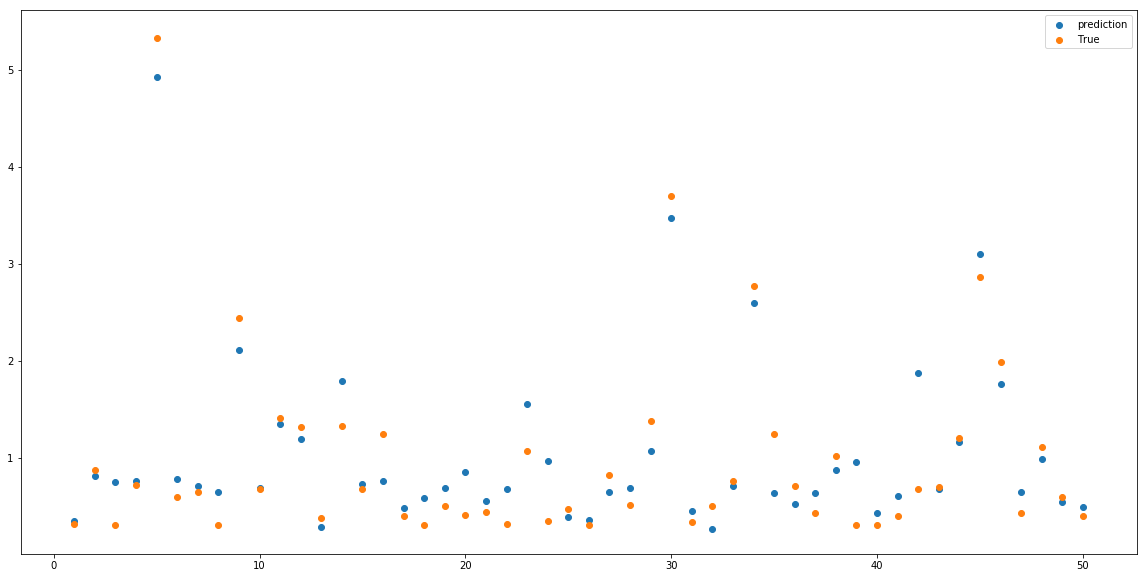

In [32]:
plt.figure(figsize=(20,10))
plt.scatter(xt,x2[-50:],label="prediction")
plt.scatter(xt,ty[-50:],label="True")
plt.legend()
plt.show()

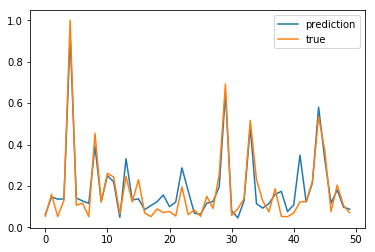

In [12]:
plt.plot(x2[-50:],label="prediction")
plt.plot(ty[-50:],label="true")
plt.legend()
plt.show()

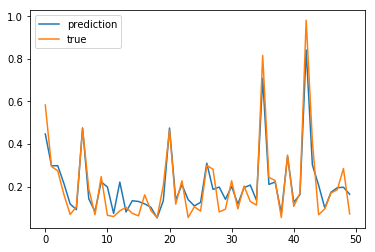

In [13]:
plt.plot(x2[:50],label="prediction")
plt.plot(ty[:50],label="true")
plt.legend()
plt.show()

In [72]:
x=model.predict(test_X)

In [73]:
x2=list(x)
ty=list(test_Y)

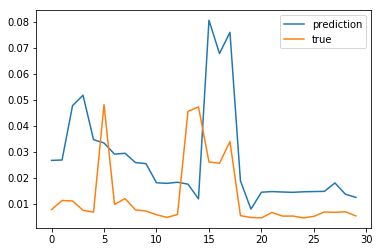

In [74]:
plt.plot(x2[-30:],label="prediction")
plt.plot(ty[-30:],label="true")
plt.legend()
plt.show()

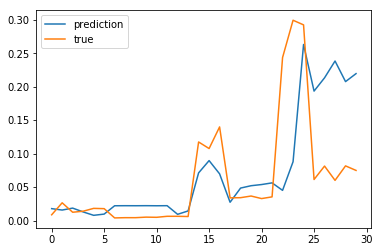

In [75]:
plt.plot(x2[:30],label="prediction")
plt.plot(ty[:30],label="true")
plt.legend()
plt.show()

In [84]:
from keras import Sequential
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(14,28)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
adam = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mse', optimizer='adam')
# fit network

model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size, verbose=True,validation_data=(test_X, test_Y))


Train on 3068 samples, validate on 617 samples
Epoch 1/3000
3068/3068 [==============================] - 1s 286us/step - loss: 0.0103 - val_loss: 0.0091
Epoch 2/3000
3068/3068 [==============================] - 0s 63us/step - loss: 0.0065 - val_loss: 0.0079
Epoch 3/3000
3068/3068 [==============================] - 0s 58us/step - loss: 0.0055 - val_loss: 0.0081
Epoch 4/3000
3068/3068 [==============================] - 0s 59us/step - loss: 0.0049 - val_loss: 0.0076
Epoch 5/3000
3068/3068 [==============================] - 0s 60us/step - loss: 0.0048 - val_loss: 0.0083
Epoch 6/3000
3068/3068 [==============================] - 0s 59us/step - loss: 0.0045 - val_loss: 0.0083
Epoch 7/3000
3068/3068 [==============================] - 0s 59us/step - loss: 0.0044 - val_loss: 0.0087
Epoch 8/3000
3068/3068 [==============================] - 0s 60us/step - loss: 0.0041 - val_loss: 0.0091
Epoch 9/3000
3068/3068 [==============================] - 0s 60us/step - loss: 0.0040 - val_loss: 0.0096
Epoch 1

3068/3068 [==============================] - 0s 56us/step - loss: 4.2860e-04 - val_loss: 0.0124
Epoch 151/3000
3068/3068 [==============================] - 0s 57us/step - loss: 6.3421e-04 - val_loss: 0.0119
Epoch 152/3000
3068/3068 [==============================] - 0s 55us/step - loss: 4.2425e-04 - val_loss: 0.0120
Epoch 153/3000
3068/3068 [==============================] - 0s 54us/step - loss: 3.2408e-04 - val_loss: 0.0120
Epoch 154/3000
3068/3068 [==============================] - 0s 58us/step - loss: 3.4422e-04 - val_loss: 0.0117
Epoch 155/3000
3068/3068 [==============================] - 0s 59us/step - loss: 2.5924e-04 - val_loss: 0.0117
Epoch 156/3000
3068/3068 [==============================] - 0s 60us/step - loss: 2.2971e-04 - val_loss: 0.0121
Epoch 157/3000
3068/3068 [==============================] - 0s 58us/step - loss: 2.1736e-04 - val_loss: 0.0121
Epoch 158/3000
3068/3068 [==============================] - 0s 53us/step - loss: 2.2376e-04 - val_loss: 0.0113
Epoch 159/3000
3

KeyboardInterrupt: 

In [26]:
pred=model.predict(test_X)

In [27]:
test_Y

array([[0.07878694],
       [0.07878694],
       [0.07878694],
       ...,
       [0.26207454],
       [0.26207454],
       [0.26207454]])

In [28]:
pred

array([[0.0676765 ],
       [0.12150494],
       [0.15240528],
       ...,
       [0.10703984],
       [0.1087677 ],
       [0.10412569]], dtype=float32)

In [70]:
model.predict(test_X)

array([[0.02127711],
       [0.02044024],
       [0.02340356],
       [0.01352202],
       [0.00941479],
       [0.0111116 ],
       [0.02215815],
       [0.02222325],
       [0.02223696],
       [0.02228309],
       [0.02207029],
       [0.0223193 ],
       [0.00964812],
       [0.01607773],
       [0.0630288 ],
       [0.10387273],
       [0.0875598 ],
       [0.05165766],
       [0.04251501],
       [0.0451017 ],
       [0.04781475],
       [0.0487132 ],
       [0.04785612],
       [0.09092495],
       [0.26584777],
       [0.18297984],
       [0.19919486],
       [0.22334237],
       [0.19460985],
       [0.20575479],
       [0.20572455],
       [0.25384   ],
       [0.21976855],
       [0.21351843],
       [0.23064156],
       [0.28437933],
       [0.21565685],
       [0.20272067],
       [0.01897604],
       [0.01902824],
       [0.01903592],
       [0.01906431],
       [0.01913155],
       [0.01522831],
       [0.01604233],
       [0.01579382],
       [0.3191768 ],
       [0.368